Project Outline:
Data Collection using Tweepy:

Set up a Twitter API account and use Tweepy to fetch tweets based on a specific keyword, hashtag, or user.
Preprocessing the Tweets:

Clean the text by removing special characters, URLs, and punctuation.
Tokenize the text into words or phrases.
Apply techniques like stemming/lemmatization.
Sentiment Analysis:

Use NLTK for text processing and feature extraction (bag-of-words, TF-IDF).
Apply classification algorithms from Scikit-learn like Logistic Regression, Naive Bayes, or SVM.
Evaluate the model's performance using metrics like accuracy, precision, recall, and F1-score.

In [7]:
import pandas as pd        #dataframe for data manipulation and analysis, in the form of table data
import re                  #regular expression, pattern matching with strings
from textblob import TextBlob           #processing of text data, from NLTK also used for sentiment analysis
from sklearn.feature_extraction.text import TfidfVectorizer     #converts a collection of raw docs into matrix of Tf IDF
from sklearn.model_selection import train_test_split        
from sklearn.svm import SVC     #Support Vector Classifier, effective high dimentional classification, prone to overfitting
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [5]:
#Now lets load the tweets from the csv file
tweets_df = pd.read_excel('/Users/aravindryali/Desktop/dataset_sentiment_analysis.xlsx')

In [6]:
# Assuming 'labels_column' contains your target variable
class_distribution = tweets_df['Sentiment'].value_counts()
print(class_distribution)

Sentiment
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Sentiment labels')

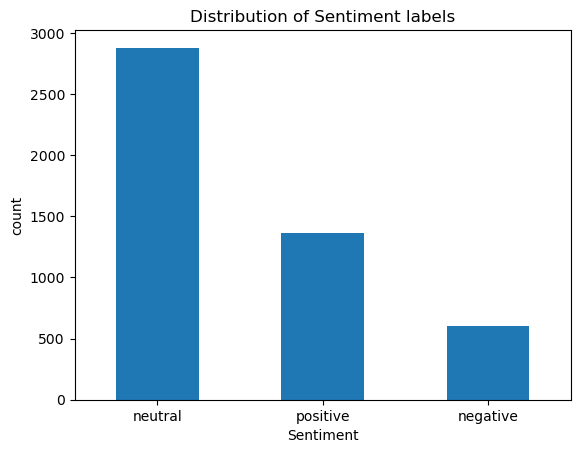

In [21]:
class_distribution.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('count')
plt.title('Distribution of Sentiment labels')

In [25]:
# Preprocessing the tweets
def preprocess_text(text):     #text, representing the tweet that needs to be processed.
    processed_tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())   #removes the usernames, links and others and make the tweet clean and store it in this variable.
    return processed_tweet

In [26]:
#creates a new column in the dataset which has the cleaned tweets, i.e preprocess_text
tweets_df['processed_text'] = tweets_df['text'].apply(preprocess_text)


In [27]:
tweets_df.head(5)

,Sentiment,text,Unnamed: 2,Unnamed: 3,processed_text
0,neutral,"According to Gran , the company has no plans t...",NaN,NaN,According to Gran the company has no plans to ...
1,neutral,Technopolis plans to develop in stages an area...,NaN,NaN,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...,NaN,NaN,The international electronic industry company ...
3,positive,With the new production plant the company woul...,NaN,NaN,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...,NaN,NaN,According to the company s updated strategy fo...


In [30]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', stop_words='english')      #TFIDF - converting the text document into matrix of vectors. Max features are limited to 1000 for dimentionality reduction and to keep our focus on the most important words, analyzer = word means we analyze them word by word and stop words is english to remove the stop words
text_features = vectorizer.fit_transform(tweets_df['processed_text']).toarray()         #converts them into sparse matrix which do not store zero values. these zero values occur because most of the frequent words might not occure in vacabloury and toarray makes it into a dense matrix which contains zeros as well. we need complete data for better analysis.


In [31]:
# Splitting matrix data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text_features, tweets_df['Sentiment'], test_size=0.2, random_state=42)      #take text_features which is the output after vectorization and make the sentiment column as the target varaible. text size is 0.2 i.e 20% as test and 80mas training. random state = 42 is randomly shuffling the data for splitting. 42 is just a random number which is liked by most of the mathematicians for some unknown reason. the point is having a constant number.

In [32]:
# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')       #linear svm is used for high dimentional datasets which as more features. work well if the relationships are linearly seperable
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [33]:
# Predicting sentiment
y_pred = svm_classifier.predict(X_test)

In [34]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [36]:
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.7515463917525773
Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.51      0.60       110
     neutral       0.75      0.93      0.83       571
    positive       0.76      0.49      0.59       289

    accuracy                           0.75       970
   macro avg       0.75      0.64      0.68       970
weighted avg       0.75      0.75      0.73       970



In [40]:
#we implement a random classifier and compare its accuracy with our linear SVM
from sklearn.dummy import DummyClassifier
most_frequent_baseline = DummyClassifier(strategy='most_frequent')
most_frequent_baseline.fit(X_train, y_train)
baseline_predictions = most_frequent_baseline.predict(X_test)
baseline_accuracy = accuracy_score(y_test, baseline_predictions)
print(f"Baseline Accuracy: {baseline_accuracy}")
print(f"Model Accuracy: {accuracy_score(y_test, y_pred)}")

Baseline Accuracy: 0.588659793814433
Model Accuracy: 0.7515463917525773
Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.51      0.60       110
     neutral       0.75      0.93      0.83       571
    positive       0.76      0.49      0.59       289

    accuracy                           0.75       970
   macro avg       0.75      0.64      0.68       970
weighted avg       0.75      0.75      0.73       970



In [71]:
svm_classifier = SVC(kernel='linear', class_weight='balanced') 
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.7134020618556701
Classification Report:
              precision    recall  f1-score   support

    negative       0.46      0.66      0.54       110
     neutral       0.81      0.78      0.80       571
    positive       0.66      0.61      0.63       289

    accuracy                           0.71       970
   macro avg       0.64      0.68      0.66       970
weighted avg       0.73      0.71      0.72       970

